# Adversarial Search: Playing Connect 4

Student Name: Varshini Yenjarlapati

I have used the following AI tools: Google,Chatgpt 3.5,stackoverflow

I understand that my submission needs to be my own work: YV

## Instructions

Total Points: Undegraduates 100, graduate students 110

Complete this notebook and submit it. The notebook needs to be a complete project report with your implementation, documentation including a short discussion of how your implementation works and your design choices, and experimental results (e.g., tables and charts with simulation results) with a short discussion of what they mean. Use the provided notebook cells and insert additional code and markdown cells as needed.

## Introduction

You will implement different versions of agents that play Connect 4:

> "Connect 4 is a two-player connection board game, in which the players choose a color and then take turns dropping colored discs into a seven-column, six-row vertically suspended grid. The pieces fall straight down, occupying the lowest available space within the column. The objective of the game is to be the first to form a horizontal, vertical, or diagonal line of four of one's own discs." (see [Connect Four on Wikipedia](https://en.wikipedia.org/wiki/Connect_Four))

Note that [Connect-4 has been solved](https://en.wikipedia.org/wiki/Connect_Four#Mathematical_solution  )
in 1988. A connect-4 solver with a discussion of how to solve different parts of the problem can be found here: https://connect4.gamesolver.org/en/

## Task 1: Defining the Search Problem [10 point]

Define the components of the search problem:

* Initial state
* Actions
* Transition model (result function)
* Goal state (terminal state and utility)

Describe each component and then implement it as a function that can be used by search algorithms.

In [96]:
# Your code/answer goes here.
# Implementation of Task 1

def initial_state():
    return [[0 for _ in range(7)] for _ in range(6)]

def actions(state):
    return [col for col in range(7) if state[0][col] == 0]

def result(state, action, player):
    new_state = [row[:] for row in state]
    for row in reversed(range(6)):
        if new_state[row][action] == 0:
            new_state[row][action] = player
            break
    return new_state

def is_terminal(state):
    return check_win(state, 1) or check_win(state, 2) or all(state[0][col] != 0 for col in range(7))

def utility(state, player):
    if check_win(state, player):
        return 1
    elif check_win(state, 3 - player):
        return -1
    else:
        return 0

def check_win(state, player):
    for row in range(6):
        for col in range(7):
            if col <= 3 and all(state[row][col + i] == player for i in range(4)):
                return True
            if row <= 2 and all(state[row + i][col] == player for i in range(4)):
                return True
            if row <= 2 and col <= 3 and all(state[row + i][col + i] == player for i in range(4)):
                return True
            if row <= 2 and col >= 3 and all(state[row + i][col - i] == player for i in range(4)):
                return True
    return False


1. **Initial State**:  
The starting position is an empty 6x7 grid where all cells are empty.

2. **Actions**:  
Moves involve dropping a disc into a column that is not full.

3. **Transition Model**:  
When a player makes a move, the disc drops to the lowest available spot in the chosen column, updating the grid.

4. **Goal State**:  
 The game ends when a player connects four discs (horizontally, vertically, or diagonally) or when the grid is full.  
 Player 1 wins (+1).
 Player 2 wins(-1).
 Draw(0).

How big is the state space? Give an estimate and explain it.

The state space size of Connect 4 is the total number of possible configurations of the board, which can be estimated as follows:
Board Dimensions: The standard Connect 4 board has 6 rows and 7 columns, making a total of 6x7 = 42 slots.

Possible States for Each Slot:
Each slot can be either empty, filled by Player 1, or filled by Player 2.
Therefore, there are 3 possible states for each slot.

Total Possible Configurations:
Assuming every slot can independently take one of these 3 states, the total number of board configurations is 3^42.

Considering only valid configurations reduces the size significantly but still leaves an enormous number of possibilities.

Conclusion:
The estimated state space for Connect 4, including both valid and invalid configurations, is approximately 3^42. This demonstrates the complexity of the game and the challenge of exhaustive computation.

How big is the game tree that minimax search will go through? Give an estimate and explain it.

The game tree for Connect 4 is extremely large because there are many possible moves and outcomes.

Branching Factor: On a 6×7 board, there are up to 7 possible moves (one for each column) at each turn.

Depth: The maximum number of moves in a game is 42, as there are 42 spaces on the board. This represents the depth of the game tree.

Size of the Tree: To estimate the size of the tree, we calculate 7^42. This means the tree could have about 1 followed by 35 zeros possible states if all moves are considered.

Some moves are illegal (like placing a piece in a full column), so fewer branches are valid.
The game ends when someone wins, so many branches are cut short.

In short, the game tree is enormous, but strategies like pruning and limiting depth help manage it.

## Task 2: Game Environment and Random Agent [25 point]

Use a numpy character array as the board.

In [97]:
import numpy as np

def empty_board(shape=(6, 7)):
    return np.full(shape=shape, fill_value=0)

print(empty_board())

[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]


The standard board is $6 \times 7$ but you can use smaller boards to test your code. Instead of colors (red and yellow), I use 1 and -1 to represent the players. Make sure that your agent functions all have the from: `agent_type(board, player = 1)`, where board is the current board position (in the format above) and player is the player whose next move it is and who the agent should play (as 1 and -1).

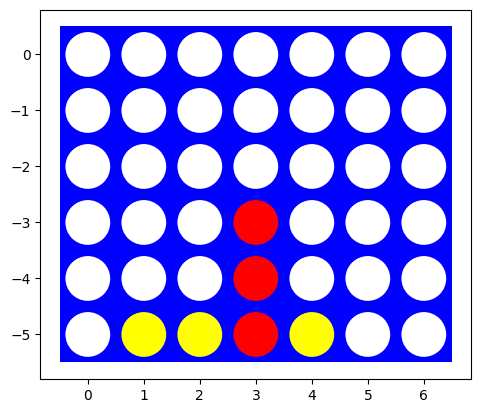

In [98]:
# Visualization code by Randolph Rankin

import matplotlib.pyplot as plt

def visualize(board):
    plt.axes()
    rectangle=plt.Rectangle((-0.5,len(board)*-1+0.5),len(board[0]),len(board),fc='blue')
    circles=[]
    for i,row in enumerate(board):
        for j,val in enumerate(row):
            color='white' if val==0 else 'red' if val==1 else 'yellow'
            circles.append(plt.Circle((j,i*-1),0.4,fc=color))

    plt.gca().add_patch(rectangle)
    for circle in circles:
        plt.gca().add_patch(circle)

    plt.axis('scaled')
    plt.show()

board = [[0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0],
         [0,-1,-1, 1,-1, 0, 0]]
visualize(board)

Implement helper functions for:

* A check for available actions in each state `actions(state)`.
* The transition model `result(state, player, action)`.
* Check for terminal states `terminal(state)`.
* The utility function `utility(s, player)`.

Some functions have the player in there so your agent will be able to play red or yellow.
Make sure that all these functions work with boards of different sizes (number of columns and rows).

Initial Board:


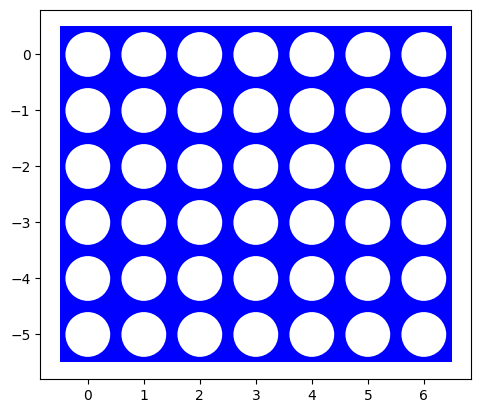

After a few moves:


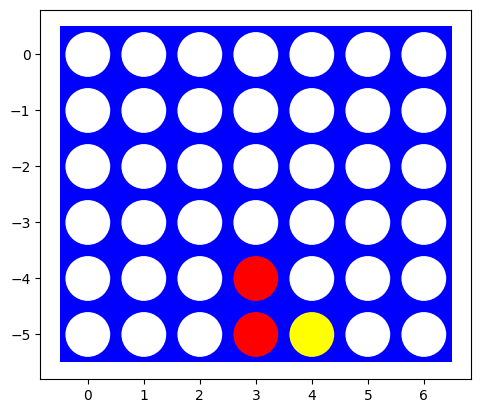

Available actions: [0, 1, 2, 3, 4, 5, 6]
Is terminal state: False
Utility for Player 1: 0
Utility for Player -1: 0


In [144]:
import random

# Generalized actions function
def actions(state):
    """
    Returns a list of valid columns where a disc can be dropped.
    Works with boards of any size.
    """
    return [col for col in range(len(state[0])) if state[0][col] == 0]

# Generalized result function
def result(state, action, player):
    """
    Returns the new state after a player places a disc in the given column.
    Works with boards of any size.
    """
    new_state = [row[:] for row in state]
    for row in reversed(range(len(state))):
        if new_state[row][action] == 0:
            new_state[row][action] = player
            break
    return new_state

# Generalized check_win function
def check_win(state, player):
    """
    Checks if the given player has a winning line (4 in a row).
    Works with boards of any size.
    """
    rows = len(state)
    cols = len(state[0])
    for r in range(rows):
        for c in range(cols):
            # Horizontal
            if c + 3 < cols and all(state[r][c + i] == player for i in range(4)):
                return True
            # Vertical
            if r + 3 < rows and all(state[r + i][c] == player for i in range(4)):
                return True
            # Diagonal (down-right)
            if r + 3 < rows and c + 3 < cols and all(state[r + i][c + i] == player for i in range(4)):
                return True
            # Diagonal (down-left)
            if r + 3 < rows and c - 3 >= 0 and all(state[r + i][c - i] == player for i in range(4)):
                return True
    return False

# Generalized is_terminal function
def is_terminal(state):
    """
    Checks if the game has reached a terminal state.
    Works with boards of any size.
    """
    return check_win(state, 1) or check_win(state, -1) or all(state[0][col] != 0 for col in range(len(state[0])))

# Generalized utility function
def utility(state, player):
    """
    Returns the utility of the state for the given player.
    Works with boards of any size.
    """
    if check_win(state, player):
        return 1
    elif check_win(state, -player):
        return -1
    else:
        return 0
# Demonstration function to test helper functions
def test_helper_functions():
    # Initial empty board
    board = [[0 for _ in range(7)] for _ in range(6)]
    print("Initial Board:")
    visualize(board)

    # Apply some moves
    board = result(board, 3, 1)
    board = result(board, 4, -1)
    board = result(board, 3, 1)
    print("After a few moves:")
    visualize(board)

    print("Available actions:", actions(board))
    print("Is terminal state:", is_terminal(board))
    print("Utility for Player 1:", utility(board, 1))
    print("Utility for Player -1:", utility(board, -1))

# Run the demonstration
test_helper_functions()


Implement an agent that plays randomly. Make sure the agent function receives as the percept the board and returns a valid action. Use an agent function definition with the following signature (arguments):

`def random_player(board, player = 1): ...`

The argument `player` is used for agents that do not store what color they are playing. The value passed on by the environment should be 1 ot -1 for player red and yellow, respectively.  See [Experiments section for tic-tac-toe](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_and_or_tree_search.ipynb#Experiments) for an example.

Initial Board:


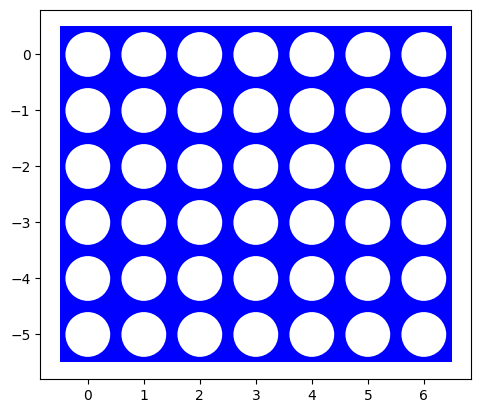

Move 1: Player 1 places a disc in column 3.


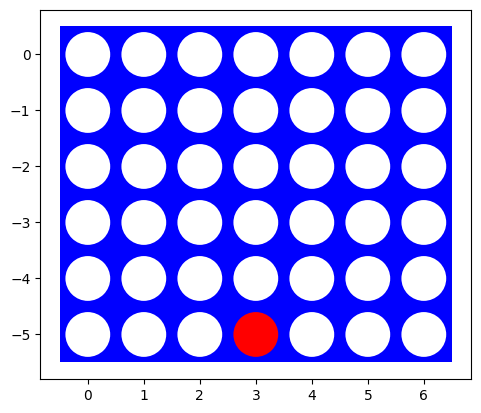

Move 2: Player -1 places a disc in column 3.


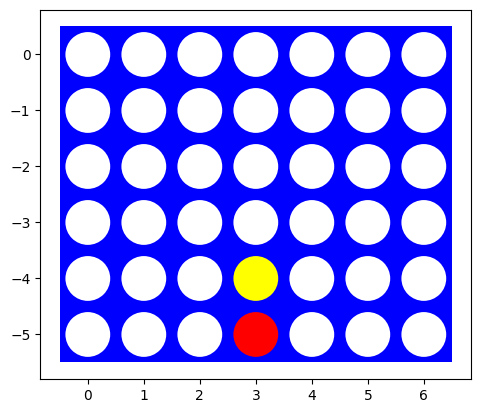

Move 3: Player 1 places a disc in column 1.


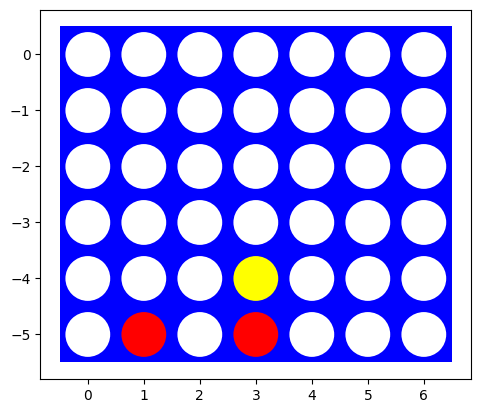

Move 4: Player -1 places a disc in column 3.


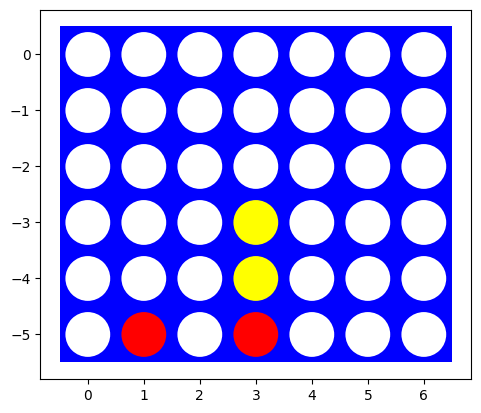

Move 5: Player 1 places a disc in column 1.


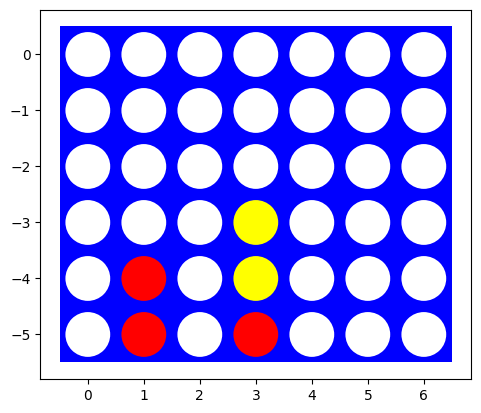

Move 6: Player -1 places a disc in column 6.


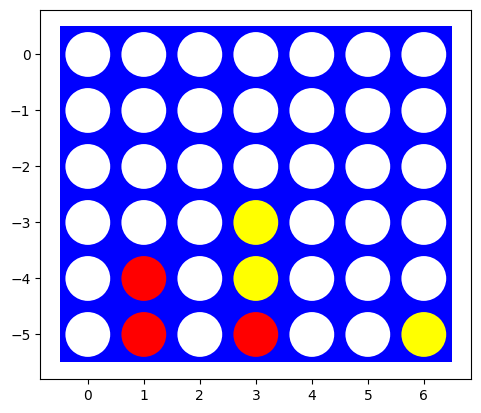

Move 7: Player 1 places a disc in column 3.


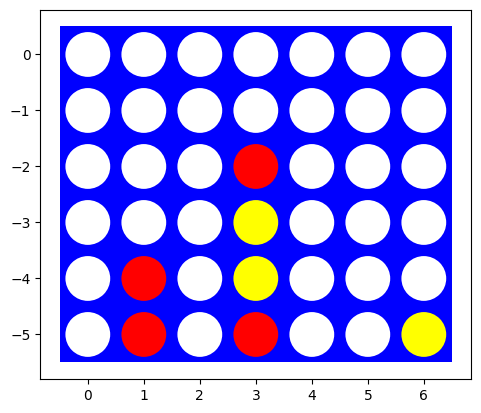

Move 8: Player -1 places a disc in column 5.


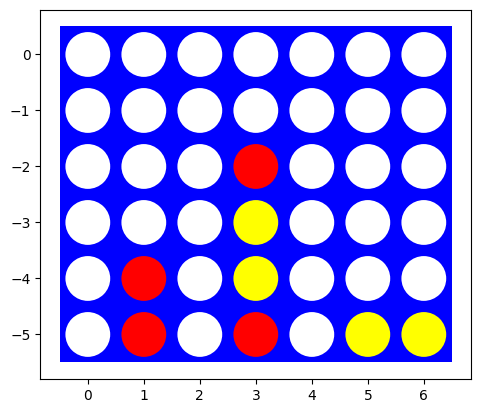

Move 9: Player 1 places a disc in column 1.


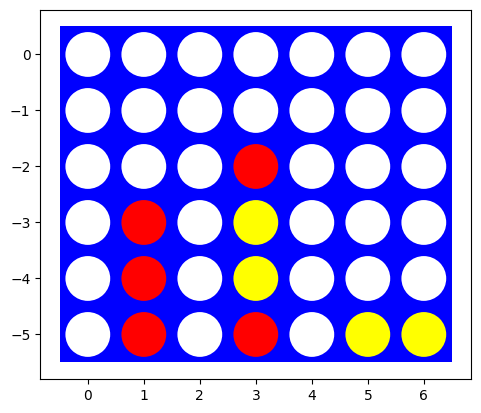

Move 10: Player -1 places a disc in column 6.


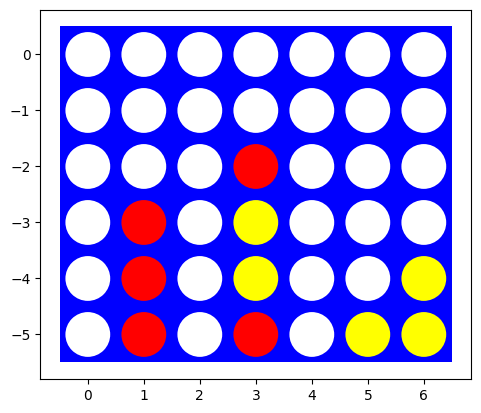

Move 11: Player 1 places a disc in column 6.


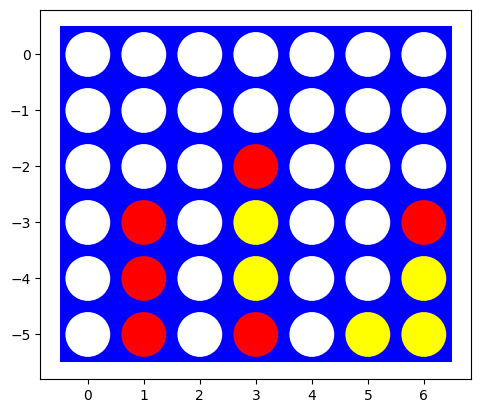

Move 12: Player -1 places a disc in column 4.


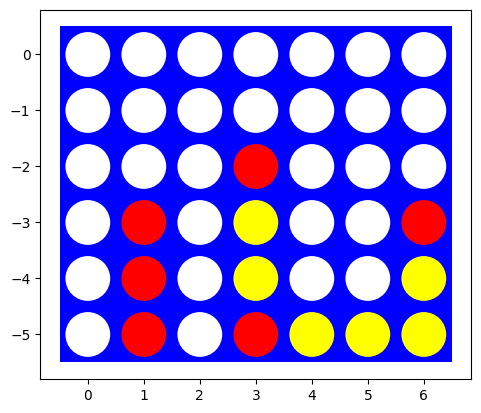

Move 13: Player 1 places a disc in column 3.


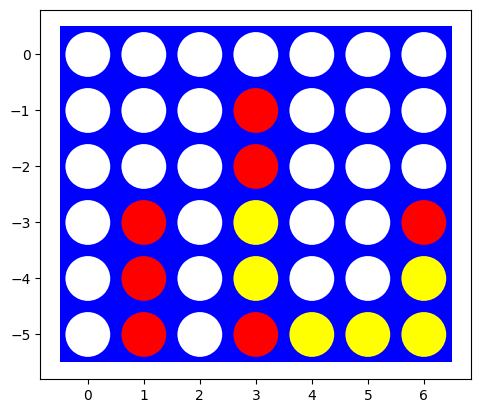

Move 14: Player -1 places a disc in column 5.


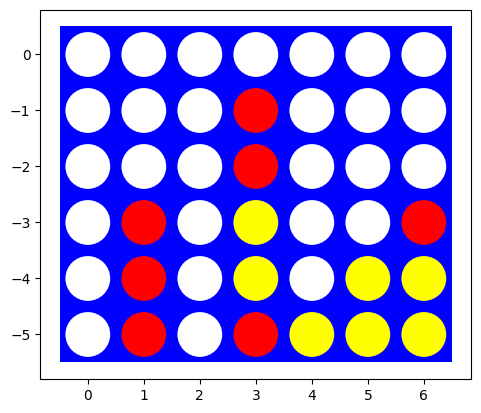

Move 15: Player 1 places a disc in column 3.


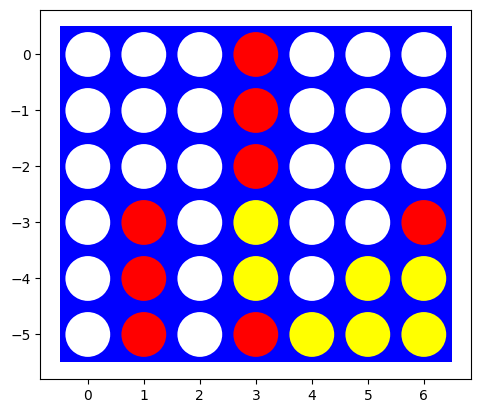

Move 16: Player -1 places a disc in column 4.


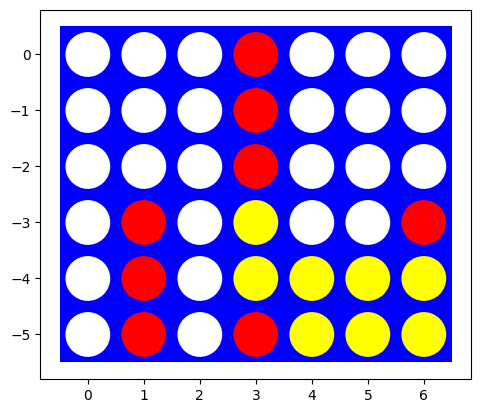

Player -1 wins!


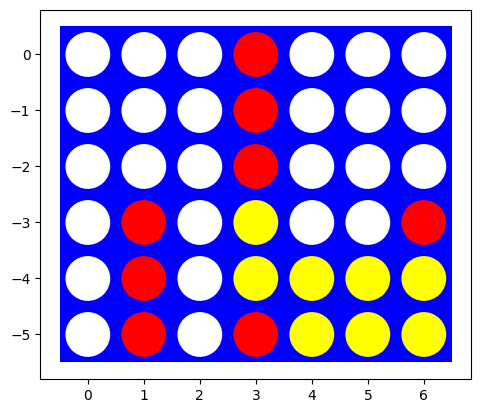

In [147]:
# Your code/ answer goes here.
def random_player(board, player=1):
    """
    Random agent that selects a valid column to drop a disc.
    Parameters:
        board (list of list of int): The current board state.
        player (int): The player making the move (1 or -1).
    Returns:
        int: The column index for the selected move.
    """
    # Get valid actions (columns) using the `actions` function
    valid_actions = actions(board)
    if valid_actions:
        return random.choice(valid_actions)
    return None  # No valid moves
def play_random_game_until_end():
    board = [[0 for _ in range(7)] for _ in range(6)]  # Empty 6x7 board
    print("Initial Board:")
    visualize(board)

    current_player = 1  # Start with Player 1
    move_count = 0

    while not is_terminal(board):
        move = random_player(board, current_player)
        if move is not None:
            board = result(board, move, current_player)
            move_count += 1
            print(f"Move {move_count}: Player {current_player} places a disc in column {move}.")
            visualize(board)
        else:
            print(f"No valid moves left for Player {current_player}.")
            break

        if check_win(board, current_player):
            print(f"Player {current_player} wins!")
            visualize(board)
            return

        current_player = -current_player

    print("The game ends in a draw.")
    visualize(board)

# Run the game
play_random_game_until_end()

Let two random agents play against each other 1000 times. Look at the [Experiments section for tic-tac-toe](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_and_or_tree_search.ipynb#Experiments) to see how the environment uses the agent functions to play against each other.

How often does each player win? Is the result expected?

In [148]:
# Your code/ answer goes here.
def simulate_games(num_games=1000, rows=6, cols=7):
    """
    Simulates num_games of Connect-4 where two random agents play against each other.

    """
    results = {"Player 1 Wins": 0, "Player 2 Wins": 0, "Draws": 0}

    for _ in range(num_games):
        # Initialize the board
        board = [[0 for _ in range(cols)] for _ in range(rows)]
        current_player = 1  # Start with Player 1

        # Simulate a single game
        while not is_terminal(board):  # Uses your provided is_terminal function
            action = random_player(board, current_player)  # Use random_player for both players
            if action is not None:
                board = result(board, action, current_player)  # Update the board
                current_player = -current_player  # Switch player
            else:
                break  # No valid moves left

        # Check the result of the game
        if check_win(board, 1):
            results["Player 1 Wins"] += 1
        elif check_win(board, -1):
            results["Player 2 Wins"] += 1
        else:
            results["Draws"] += 1

    return results

# Run simulation
results = simulate_games(num_games=1000,rows=6,cols=7)

# Print results
print(f"Results after 1000 games:")
print(f"Player 1 Wins: {results['Player 1 Wins']}")
print(f"Player 2 Wins: {results['Player 2 Wins']}")
print(f"Draws: {results['Draws']}")


Results after 1000 games:
Player 1 Wins: 562
Player 2 Wins: 436
Draws: 2



Player 1 wins: 56.2% of the games.
Player 2 wins: 43.6% of the games.
Draws: 0.2% of the games.

Yes, the result makes sense:

**Player 1 Starts First:** Player 1 has an advantage because they get the first move, so they win slightly more often.

**Random Moves:** Both players make random moves, so the game outcomes are mostly balanced, with some randomness affecting the results.

**Draws:** Connect-4 rarely ends in a draw because someone usually wins before the board fills up.

## Task 3: Minimax Search with Alpha-Beta Pruning

### Implement the Search [20 points]

Implement minimax search starting from a given board for specifying the player.

__Important Notes:__
* You can use code from the [tic-tac-toe example](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_alpha_beta_tree_search.ipynb).
* Make sure that all your agent functions have a signature consistent with the random agent above and that it [uses a class to store state information.](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/HOWTOs/store_agent_state_information.ipynb)
This is essential to be able play against agents from other students later.
* The game tree for a $6 \times 7$ board is huge and optimal algorithms need to visit each or a large percentage of all nodes in the tree. You can experiment with smaller boards like a $4 \times 4$ board first.

In [185]:
class MinimaxAgent:
    def __init__(self, depth_limit=4):
        self.depth_limit = depth_limit

    def evaluate(self, board, player):
        """
        Generalized heuristic evaluation function for Connect Four.
        """
        opponent = -player
        score = 0

        # Dynamically assigned weights for line lengths
        weights = {n: 10 ** (n - 1) for n in range(2, 5)}

        # Helper to count lines of length n
        def count_lines(board, player, n):
            rows, cols = len(board), len(board[0])
            count = 0

            # Check horizontal, vertical, and diagonal lines
            for r in range(rows):
                for c in range(cols):
                    # Horizontal
                    if c + n - 1 < cols and all(board[r][c + i] == player for i in range(n)):
                        count += 1
                    # Vertical
                    if r + n - 1 < rows and all(board[r + i][c] == player for i in range(n)):
                        count += 1
                    # Diagonal (down-right)
                    if r + n - 1 < rows and c + n - 1 < cols and all(board[r + i][c + i] == player for i in range(n)):
                        count += 1
                    # Diagonal (down-left)
                    if r + n - 1 < rows and c - n + 1 >= 0 and all(board[r + i][c - i] == player for i in range(n)):
                        count += 1
            return count

        # Calculate scores for the player and opponent
        for n, weight in weights.items():
            score += weight * count_lines(board, player, n)
            score -= weight * count_lines(board, opponent, n)

        # Prefer central columns
        center_column = len(board[0]) // 2
        for row in board:
            score += row[center_column] * 3  # Center column weight

        return score

    def minimax(self, board, depth, alpha, beta, maximizing_player, player):
        """
        Minimax algorithm with alpha-beta pruning.
        """
        valid_actions = actions(board)

        # Base case: terminal state or depth limit
        if depth == 0 or is_terminal(board):
            return self.evaluate(board, player)

        if maximizing_player:
            max_eval = float('-inf')
            for action in valid_actions:
                child_board = result(board, action, player)
                eval_score = self.minimax(child_board, depth - 1, alpha, beta, False, player)
                max_eval = max(max_eval, eval_score)
                alpha = max(alpha, eval_score)
                if beta <= alpha:
                    break
            return max_eval
        else:
            min_eval = float('inf')
            for action in valid_actions:
                child_board = result(board, action, -player)
                eval_score = self.minimax(child_board, depth - 1, alpha, beta, True, player)
                min_eval = min(min_eval, eval_score)
                beta = min(beta, eval_score)
                if beta <= alpha:
                    break
            return min_eval

    def select_action(self, board, player):
        """
        Select the best action for the current player using Minimax with Alpha-Beta Pruning.
        """
        best_score = float('-inf')
        best_action = None

        # Debugging info
        action_scores = []

        for action in actions(board):
            child_board = result(board, action, player)
            eval_score = self.minimax(child_board, self.depth_limit, float('-inf'), float('inf'), False, player)
            # Log board state and score
            print(f"Action: {action}")
            for row in child_board:
                print(row)
            print(f"Score: {eval_score}\n")
            action_scores.append((action, eval_score))
            if eval_score > best_score:
                best_score = eval_score
                best_action = action

        # Print action scores for debugging
        print(f"Action scores: {action_scores}")

        return best_action


Experiment with some manually created boards (at least 5) to check if the agent spots winning opportunities.

In [186]:
def test_minimax_with_manual_boards():
    minimax_agent = MinimaxAgent(depth_limit=4)
    test_cases = [
        ([[0, 0, 0, 0],
          [0, 0, 0, 0],
          [0, 0, 1, 1],
          [0, 0, 1, 1]], 1),  # Player 1 wins with column 2
        ([[0, 0, 0, 0],
          [0, -1, -1, 0],
          [0, -1, 1, 1],
          [1, 1, -1, -1]], 1),  # Player 1 should block column 0
        ([[0, 0, 0, 0],
          [0, 1, 0, 0],
          [0, 1, 0, 0],
          [0, 1, 0, 0]], 1),  # Player 1 wins with column 1
        ([[0, 0, 0, 0],
          [0, 0, 0, 0],
          [1, -1, 0, 0],
          [-1, 1, 1, 0]], -1),  # Player -1 blocks column 0
        ([[0, 0, 0, 0],
          [0, 1, -1, 0],
          [1, -1, 1, 0],
          [-1, 1, -1, 0]], 1)  # Player 1 wins with column 1
    ]

    for i, (board, player) in enumerate(test_cases, 1):
        print(f"Test Case {i}:")
        print("Board before move:")
        for row in board:
            print(row)
        action = minimax_agent.select_action(board, player)
        print(f"Player {player} selects column: {action}\n")


# Run the test cases
test_minimax_with_manual_boards()


Test Case 1:
Board before move:
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 1, 1]
[0, 0, 1, 1]
Action: 0
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 1, 1]
[1, 0, 1, 1]
Score: 426

Action: 1
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 1, 1]
[0, 1, 1, 1]
Score: 539

Action: 2
[0, 0, 0, 0]
[0, 0, 1, 0]
[0, 0, 1, 1]
[0, 0, 1, 1]
Score: 536

Action: 3
[0, 0, 0, 0]
[0, 0, 0, 1]
[0, 0, 1, 1]
[0, 0, 1, 1]
Score: 539

Action scores: [(0, 426), (1, 539), (2, 536), (3, 539)]
Player 1 selects column: 1

Test Case 2:
Board before move:
[0, 0, 0, 0]
[0, -1, -1, 0]
[0, -1, 1, 1]
[1, 1, -1, -1]
Action: 0
[0, 0, 0, 0]
[0, -1, -1, 0]
[1, -1, 1, 1]
[1, 1, -1, -1]
Score: -200

Action: 1
[0, 1, 0, 0]
[0, -1, -1, 0]
[0, -1, 1, 1]
[1, 1, -1, -1]
Score: -146

Action: 2
[0, 0, 1, 0]
[0, -1, -1, 0]
[0, -1, 1, 1]
[1, 1, -1, -1]
Score: -220

Action: 3
[0, 0, 0, 0]
[0, -1, -1, 1]
[0, -1, 1, 1]
[1, 1, -1, -1]
Score: -26

Action scores: [(0, -200), (1, -146), (2, -220), (3, -26)]
Player 1 selects column: 3

Test Case 3:
Board before move:
[0, 0, 0,

How long does it take to make a move? Start with a smaller board with 4 columns and make the board larger by adding columns/rows. Explain why using this algorithm on a standard $6 \times 7$ board takes forever.

In [187]:
# Your code/ answer goes here.
import time

def measure_move_time(rows, cols, depth_limit):
    board = [[0 for _ in range(cols)] for _ in range(rows)]
    minimax_agent = MinimaxAgent(depth_limit)
    start_time = time.time()
    minimax_agent.select_action(board, player=1)
    end_time = time.time()
    return end_time - start_time

for size in [(4, 4), (5, 6), (6, 7)]:
    time_taken = measure_move_time(*size, depth_limit=4)
    print(f"Time taken for a move on {size[0]}×{size[1]} board: {time_taken:.2f} seconds")


Action: 0
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[1, 0, 0, 0]
Score: 27

Action: 1
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 1, 0, 0]
Score: 30

Action: 2
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 1, 0]
Score: 33

Action: 3
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 1]
Score: 30

Action scores: [(0, 27), (1, 30), (2, 33), (3, 30)]
Time taken for a move on 4×4 board: 0.10 seconds
Action: 0
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0]
Score: 27

Action: 1
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0]
Score: 27

Action: 2
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0]
Score: 30

Action: 3
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 0]
Score: 36

Action: 4
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 0]
Score: 30

Action: 5
[0, 0, 0, 0, 0, 0

As the board gets bigger, the time to make a move increases a lot because the Minimax algorithm has to check many more possible moves and outcomes. On a small 4×4 board, it’s fast (0.10 seconds), but on a 6×7 board, it takes much longer (3.05 seconds). This happens because the number of possibilities grows very quickly as the board gets larger, making the calculations take more time.

### Move ordering [5 points]

Starting the search with better moves will increase the efficiency of alpha-beta pruning. Describe and implement a simple move ordering strategy. Make a table that shows how the ordering strategies influence the time it takes to make a move?

In [188]:
class MinimaxAgentWithOrdering(MinimaxAgent):
    def order_moves(self, board, player):
        valid_actions = actions(board)
        scored_moves = []
        for action in valid_actions:
            resulting_board = result(board, action, player)
            score = self.evaluate(resulting_board, player)
            scored_moves.append((action, score))
        scored_moves.sort(key=lambda x: x[1], reverse=True)
        return [move[0] for move in scored_moves]

    def minimax(self, board, depth, alpha, beta, maximizing_player, player):
        valid_actions = self.order_moves(board, player) if maximizing_player else self.order_moves(board, -player)
        if depth == 0 or is_terminal(board):
            return self.evaluate(board, player)

        if maximizing_player:
            max_eval = float('-inf')
            for action in valid_actions:
                child_board = result(board, action, player)
                eval_score = self.minimax(child_board, depth - 1, alpha, beta, False, player)
                max_eval = max(max_eval, eval_score)
                alpha = max(alpha, eval_score)
                if beta <= alpha:
                    break
            return max_eval
        else:
            min_eval = float('inf')
            for action in valid_actions:
                child_board = result(board, action, -player)
                eval_score = self.minimax(child_board, depth - 1, alpha, beta, True, player)
                min_eval = min(min_eval, eval_score)
                beta = min(beta, eval_score)
                if beta <= alpha:
                    break
            return min_eval


In [191]:
def compare_move_ordering(rows, cols, depth_limit):
    board = [[0 for _ in range(cols)] for _ in range(rows)]
    minimax_agent = MinimaxAgent(depth_limit)
    minimax_agent_with_ordering = MinimaxAgentWithOrdering(depth_limit)

    start_time = time.time()
    minimax_agent.select_action(board, player=1)
    no_ordering_time = time.time() - start_time

    start_time = time.time()
    minimax_agent_with_ordering.select_action(board, player=1)
    ordering_time = time.time() - start_time

    return no_ordering_time, ordering_time

print("Move times with and without ordering:")
for size in [(4, 4), (5, 6), (6, 7), (6,10)]:
    no_ordering, ordering = compare_move_ordering(*size, depth_limit=4)
    print(f"{size[0]}×{size[1]} board - Without Ordering: {no_ordering:.2f}s, With Ordering: {ordering:.2f}s")


Move times with and without ordering:
Action: 0
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[1, 0, 0, 0]
Score: 27

Action: 1
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 1, 0, 0]
Score: 30

Action: 2
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 1, 0]
Score: 33

Action: 3
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 1]
Score: 30

Action scores: [(0, 27), (1, 30), (2, 33), (3, 30)]
4×4 board - Without Ordering: 0.10s, With Ordering: 0.09s
Action: 0
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0]
Score: 27

Action: 1
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0]
Score: 27

Action: 2
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0]
Score: 30

Action: 3
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 0]
Score: 36

Action: 4
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 

In [190]:
class MinimaxAgentWithOrdering(MinimaxAgent):
    def order_moves(self, board, player):
        valid_actions = actions(board)
        scored_moves = []
        for action in valid_actions:
            resulting_board = result(board, action, player)
            score = self.evaluate(resulting_board, player)
            scored_moves.append((action, score))
        scored_moves.sort(key=lambda x: x[1], reverse=True)
        return [move[0] for move in scored_moves]

    def select_action(self, board, player):
        """
        Select the best action for the current player using Minimax with Alpha-Beta Pruning and Move Ordering.
        """
        best_score = float('-inf')
        best_action = None
        action_scores = self.order_moves(board, player)
        for action in action_scores:
            child_board = result(board, action, player)
            eval_score = self.minimax(child_board, self.depth_limit, float('-inf'), float('inf'), False, player)
            if eval_score > best_score:
                best_score = eval_score
                best_action = action
        return best_action


def compare_move_ordering(rows, cols, depth_limit):
    board = [[0 for _ in range(cols)] for _ in range(rows)]
    minimax_agent = MinimaxAgent(depth_limit)
    minimax_agent_with_ordering = MinimaxAgentWithOrdering(depth_limit)

    # Without ordering
    start_time = time.time()
    best_move_no_ordering = minimax_agent.select_action(board, player=1)
    no_ordering_time = time.time() - start_time

    # With ordering
    start_time = time.time()
    best_move_with_ordering = minimax_agent_with_ordering.select_action(board, player=1)
    ordering_time = time.time() - start_time

    return no_ordering_time, ordering_time, best_move_no_ordering, best_move_with_ordering


# Comparison Table
print("Move times with and without ordering:")
for size in [(4, 4), (5, 6), (6, 7), (6, 10)]:
    no_ordering_time, ordering_time, best_move_no_ordering, best_move_with_ordering = compare_move_ordering(
        *size, depth_limit=4
    )
    print(
        f"{size[0]}×{size[1]} board - Without Ordering: {no_ordering_time:.2f}s, "
        f"Best Move: {best_move_no_ordering}, With Ordering: {ordering_time:.2f}s, Best Move: {best_move_with_ordering}"
    )


Move times with and without ordering:
Action: 0
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[1, 0, 0, 0]
Score: 27

Action: 1
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 1, 0, 0]
Score: 30

Action: 2
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 1, 0]
Score: 33

Action: 3
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 1]
Score: 30

Action scores: [(0, 27), (1, 30), (2, 33), (3, 30)]
4×4 board - Without Ordering: 0.10s, Best Move: 2, With Ordering: 0.09s, Best Move: 2
Action: 0
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0]
Score: 27

Action: 1
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0]
Score: 27

Action: 2
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0]
Score: 30

Action: 3
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 0]
Score: 36

Action: 4
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[

The move ordering strategy sorts possible moves based on how good they seem, using a heuristic score. Moves likely to lead to better results are searched first. This helps alpha-beta pruning work faster by cutting off unnecessary branches earlier in the search.

### The first few moves [5 points]

Start with an empty board. This is the worst case scenario for minimax search since it needs solve all possible games that can be played (minus some pruning) before making the decision. What can you do?

Challenges with an Empty Board:

Starting minimax search on an empty board is the most challenging scenario because the algorithm must evaluate all possible moves and game states. The sheer number of potential outcomes makes this computationally expensive. However, there are strategies to improve efficiency while maintaining competitive gameplay.

Depth Limitation:

One way to handle the complexity is to limit the depth of the search. Instead of exploring every possible move until the game ends, set a maximum depth to reduce the number of states the algorithm evaluates. While this sacrifices optimality, it ensures the agent can make decisions within a reasonable amount of time.

Heuristic Evaluation:

A heuristic evaluation function estimates the strength of a board position without playing out every possible move. This allows the agent to terminate its search early while still identifying promising moves. Heuristics are essential for efficiently guiding the search on large boards.

Move Prioritization:

Certain moves, like those in the center columns, are generally more advantageous on an empty board because they provide more opportunities for connecting four. By prioritizing these moves, the algorithm can focus on evaluating the most promising options first, improving efficiency.

Alpha-Beta Pruning:

Alpha-beta pruning eliminates unnecessary branches of the decision tree by skipping moves that cannot improve the current best outcome. This significantly reduces the computational cost of minimax search while preserving accuracy.

Iterative Deepening:

This technique involves performing shallow searches first and then deepening the search incrementally. It ensures the agent always has a good move ready, even if time runs out before completing a deeper search.


### Playtime [5 points]

Let the Minimax Search agent play a random agent on a $4 \times 4$ board. Analyze wins, losses and draws.

In [195]:
# Your code/ answer goes here.
def play_minimax_vs_random(rows=4, cols=4, num_games=5, depth_limit=4):
    results = {"Minimax Wins": 0, "Random Wins": 0, "Draws": 0}
    minimax_agent = MinimaxAgent(depth_limit)

    for _ in range(num_games):
        board = [[0 for _ in range(cols)] for _ in range(rows)]
        current_player = 1  # Minimax starts

        while not is_terminal(board):
            if current_player == 1:
                action = minimax_agent.select_action(board, current_player)
            else:
                action = random_player(board, current_player)
            if action is not None:
                board = result(board, action, current_player)
                current_player = -current_player
            else:
                break

        if check_win(board, 1):
            results["Minimax Wins"] += 1
        elif check_win(board, -1):
            results["Random Wins"] += 1
        else:
            results["Draws"] += 1

    return results

results = play_minimax_vs_random()
print(f"Minimax Wins: {results['Minimax Wins']}, Random Wins: {results['Random Wins']}, Draws: {results['Draws']}")


Action: 0
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[1, 0, 0, 0]
Score: 27

Action: 1
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 1, 0, 0]
Score: 30

Action: 2
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 1, 0]
Score: 33

Action: 3
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 1]
Score: 30

Action scores: [(0, 27), (1, 30), (2, 33), (3, 30)]
Action: 0
[0, 0, 0, 0]
[0, 0, 0, 0]
[1, 0, 0, 0]
[-1, 0, 1, 0]
Score: 40

Action: 1
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[-1, 1, 1, 0]
Score: 66

Action: 2
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 1, 0]
[-1, 0, 1, 0]
Score: 53

Action: 3
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[-1, 0, 1, 1]
Score: 56

Action scores: [(0, 40), (1, 66), (2, 53), (3, 56)]
Action: 0
[0, 0, 0, 0]
[0, 0, 0, 0]
[1, -1, 0, 0]
[-1, 1, 1, 0]
Score: 13

Action: 1
[0, 0, 0, 0]
[0, 1, 0, 0]
[0, -1, 0, 0]
[-1, 1, 1, 0]
Score: 0

Action: 2
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, -1, 1, 0]
[-1, 1, 1, 0]
Score: 43

Action: 3
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, -1, 0, 0]
[-1, 1, 1, 1]
Score: 107

Action s

## Task 4: Heuristic Alpha-Beta Tree Search

### Heuristic evaluation function [15 points]

Define and implement a heuristic evaluation function. Make sure that the heuristic value stays in the correct range.

In [137]:
# Your code/ answer goes here.
def heuristic_evaluation(board, player):
    """
    Evaluates the board state for the given player.
    Higher values are better for the player, lower values are worse.
    """
    opponent = -player

    def count_threats(board, player):
        score = 0
        rows, cols = len(board), len(board[0])
        for r in range(rows):
            for c in range(cols):
                # Horizontal threats
                if c + 3 < cols and all(board[r][c + i] in {0, player} for i in range(4)):
                    score += 1
                # Vertical threats
                if r + 3 < rows and all(board[r + i][c] in {0, player} for i in range(4)):
                    score += 1
                # Diagonal threats (down-right)
                if r + 3 < rows and c + 3 < cols and all(board[r + i][c + i] in {0, player} for i in range(4)):
                    score += 1
                # Diagonal threats (down-left)
                if r + 3 < rows and c - 3 >= 0 and all(board[r + i][c - i] in {0, player} for i in range(4)):
                    score += 1
        return score


    # Calculate the heuristic value as the difference between the player's and opponent's threats
    player_threats = count_threats(board, player)
    opponent_threats = count_threats(board, opponent)

    # Ensure the heuristic value stays in a manageable range (e.g., -1000 to +1000)
    return player_threats - opponent_threats


In [203]:
def play_game_with_heuristic():
    """
    Simulate a Connect Four game using the heuristic evaluation for decision-making.
    """
    # Initialize an empty board
    board = [[0 for _ in range(7)] for _ in range(6)]
    current_player = 1  # Player 1 starts the game

    def select_action_with_heuristic(board, player):
        """
        Select the best action based on the heuristic evaluation function.
        """
        valid_actions = actions(board)
        best_score = float('-inf') if player == 1 else float('inf')
        best_action = None

        for action in valid_actions:
            new_board = result(board, action, player)
            score = heuristic_evaluation(new_board, player)
            if (player == 1 and score > best_score) or (player == -1 and score < best_score):
                best_score = score
                best_action = action

        return best_action

    print("Initial Board:")
    for row in board:
        print(row)

    # Game loop
    while not is_terminal(board):
        # Select the best action for the current player
        action = select_action_with_heuristic(board, current_player)
        if action is None:
            print("No valid moves! Game over.")
            break

        # Apply the action to the board
        board = result(board, action, current_player)

        # Visualize the board
        print(f"Player {current_player} plays in column {action}.")
        for row in board:
            print(row)

        # Check if the game is over
        if check_win(board, current_player):
            print(f"Game Over! Player {current_player} wins!")
            return

        # Switch players
        current_player = -current_player

    print("Game Over! It's a draw.")

# Run the game simulation
play_game_with_heuristic()


Initial Board:
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
Player 1 plays in column 3.
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 0, 0]
Player -1 plays in column 0.
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[-1, 0, 0, 1, 0, 0, 0]
Player 1 plays in column 3.
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 0, 0]
[-1, 0, 0, 1, 0, 0, 0]
Player -1 plays in column 0.
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[-1, 0, 0, 1, 0, 0, 0]
[-1, 0, 0, 1, 0, 0, 0]
Player 1 plays in column 3.
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 0, 0]
[-1, 0, 0, 1, 0, 0, 0]
[-1, 0, 0, 1, 0, 0, 0]
Player -1 plays in column 0.
[0, 0, 0, 0, 0, 

Heuristic evaluation function estimates how good a game state is for a player. It assigns a score to the board to help decide the best move without searching all possibilities. A good heuristic is fast, accurate, and gives positive scores for good states and negative scores for bad ones. In Connect Four, it values potential wins, blocks opponent threats, and prefers strategic positions like the center.

### Cutting Off Search [10 points]

Modify your minimax search with alpha-beta pruning to cut off search at a specified depth and use the heuristic evaluation function. Experiment with different cutoff values.

In [138]:
# Your code/ answer goes here.
class HeuristicAlphaBetaAgent:
    def __init__(self, depth_limit=4):
        self.depth_limit = depth_limit

    def minimax(self, board, depth, alpha, beta, maximizing_player, player):
        """
        Minimax algorithm with alpha-beta pruning and depth cutoff.
        """
        valid_actions = actions(board)

        # Base case: terminal state or depth limit
        if depth == 0 or is_terminal(board):
            return heuristic_evaluation(board, player)

        if maximizing_player:
            max_eval = float('-inf')
            for action in valid_actions:
                child_board = result(board, action, player)
                eval_score = self.minimax(child_board, depth - 1, alpha, beta, False, player)
                max_eval = max(max_eval, eval_score)
                alpha = max(alpha, eval_score)
                if beta <= alpha:
                    break
            return max_eval
        else:
            min_eval = float('inf')
            for action in valid_actions:
                child_board = result(board, action, -player)
                eval_score = self.minimax(child_board, depth - 1, alpha, beta, True, player)
                min_eval = min(min_eval, eval_score)
                beta = min(beta, eval_score)
                if beta <= alpha:
                    break
            return min_eval

    def select_action(self, board, player):
        """
        Select the best action for the current player using heuristic alpha-beta pruning.
        """
        best_score = float('-inf')
        best_action = None
        for action in actions(board):
            child_board = result(board, action, player)
            eval_score = self.minimax(child_board, self.depth_limit, float('-inf'), float('inf'), False, player)
            if eval_score > best_score:
                best_score = eval_score
                best_action = action
        return best_action


In [205]:
def play_game_with_clean_output():
    """
    Simulate a Connect Four game using two heuristic alpha-beta agents.
    Prints only the initial board, final board, and game result.
    """
    # Initialize an empty board
    board = [[0 for _ in range(7)] for _ in range(6)]
    current_player = 1  # Player 1 starts the game
    agent = HeuristicAlphaBetaAgent(depth_limit=4)

    print("Initial Board:")
    for row in board:
        print(row)

    # Game loop
    while not is_terminal(board):
        # Get the action for the current player
        action = agent.select_action(board, current_player)
        if action is None:
            print("No valid moves! Game over.")
            break

        # Apply the action to the board
        board = result(board, action, current_player)

        # Check if the game is over
        if check_win(board, current_player):
            print("\nFinal Board:")
            for row in board:
                print(row)
            print(f"\nGame Over! Player {current_player} wins!")
            return

        # Switch players
        current_player = -current_player

    # If no player wins, it's a draw
    print("\nFinal Board:")
    for row in board:
        print(row)
    print("\nGame Over! It's a draw.")

# Run the game simulation
play_game_with_clean_output()


Initial Board:
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]

Final Board:
[-1, -1, 0, -1, 1, -1, 0]
[1, -1, 0, 1, 1, 1, 0]
[1, -1, 0, -1, -1, -1, -1]
[-1, 1, 0, 1, -1, 1, 1]
[1, -1, 0, 1, 1, -1, -1]
[-1, 1, 0, 1, -1, 1, 1]

Game Over! Player -1 wins!


In [139]:
def experiment_with_cutoff_values():
    board = [[0 for _ in range(7)] for _ in range(6)]  # Initial empty board
    player = 1  # Red (Player 1)
    cutoff_values = [2, 3, 4, 5]  # Different depth limits to test
    results = []

    for depth_limit in cutoff_values:
        agent = HeuristicAlphaBetaAgent(depth_limit=depth_limit)
        start_time = time.time()
        best_action = agent.select_action(board, player)
        end_time = time.time()
        elapsed_time = end_time - start_time
        results.append((depth_limit, best_action, elapsed_time))

        print(f"Cutoff Depth: {depth_limit}")
        print(f"Best Action: {best_action}")
        print(f"Time Taken: {elapsed_time:.2f} seconds\n")

    return results

# Run the experiment
experiment_results = experiment_with_cutoff_values()

Cutoff Depth: 2
Best Action: 3
Time Taken: 0.11 seconds

Cutoff Depth: 3
Best Action: 3
Time Taken: 0.29 seconds

Cutoff Depth: 4
Best Action: 1
Time Taken: 1.08 seconds

Cutoff Depth: 5
Best Action: 3
Time Taken: 4.63 seconds



Experiment with the same manually created boards as above to check if the agent spots wining opportunities.

In [206]:
# Your code/ answer goes here.
def test_heuristic_with_manual_boards():
    heuristic_agent = HeuristicAlphaBetaAgent(depth_limit=4)
    test_cases = [
        ([[0, 0, 0, 0],
          [0, 0, 0, 0],
          [0, 0, 1, 1],
          [0, 0, 1, 1]], 1),
        ([[0, 0, 0, 0],
          [0, -1, -1, 0],
          [0, -1, 1, 1],
          [1, 1, -1, -1]], 1),
        ([[0, 0, 0, 0],
          [0, 1, 0, 0],
          [0, 1, 0, 0],
          [0, 1, 0, 0]], 1),
        ([[0, 0, 0, 0],
          [0, 0, 0, 0],
          [1, -1, 0, 0],
          [-1, 1, 1, 0]], -1),
        ([[0, 0, 0, 0],
          [0, 1, -1, 0],
          [1, -1, 1, 0],
          [-1, 1, -1, 0]], 1),
    ]

    for i, (board, player) in enumerate(test_cases, 1):
        print(f"Test Case {i}:")
        print("Board before move:")
        for row in board:
            print(row)
        action = heuristic_agent.select_action(board, player)
        print(f"Player {player} selects column: {action}\n")

test_heuristic_with_manual_boards()


Test Case 1:
Board before move:
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 1, 1]
[0, 0, 1, 1]
Player 1 selects column: 0

Test Case 2:
Board before move:
[0, 0, 0, 0]
[0, -1, -1, 0]
[0, -1, 1, 1]
[1, 1, -1, -1]
Player 1 selects column: 0

Test Case 3:
Board before move:
[0, 0, 0, 0]
[0, 1, 0, 0]
[0, 1, 0, 0]
[0, 1, 0, 0]
Player 1 selects column: 1

Test Case 4:
Board before move:
[0, 0, 0, 0]
[0, 0, 0, 0]
[1, -1, 0, 0]
[-1, 1, 1, 0]
Player -1 selects column: 0

Test Case 5:
Board before move:
[0, 0, 0, 0]
[0, 1, -1, 0]
[1, -1, 1, 0]
[-1, 1, -1, 0]
Player 1 selects column: 1



How long does it take to make a move? Start with a smaller board with 4 columns and make the board larger by adding columns.

In [207]:
# Your code/ answer goes here.
import time

def measure_heuristic_move_time(rows, cols, depth_limit):
    board = [[0 for _ in range(cols)] for _ in range(rows)]
    heuristic_agent = HeuristicAlphaBetaAgent(depth_limit)
    start_time = time.time()
    heuristic_agent.select_action(board, player=1)
    end_time = time.time()
    return end_time - start_time

for size in [(4, 4), (5, 6), (6, 7)]:
    time_taken = measure_heuristic_move_time(*size, depth_limit=4)
    print(f"Time taken for a move on {size[0]}×{size[1]} board: {time_taken:.2f} seconds")


Time taken for a move on 4×4 board: 0.02 seconds
Time taken for a move on 5×6 board: 0.31 seconds
Time taken for a move on 6×7 board: 1.10 seconds


### Playtime [5 points]

Let two heuristic search agents (different cutoff depth, different heuristic evaluation function) compete against each other on a reasonably sized board. Since there is no randomness, you only need to let them play once.

In [212]:
# Your code/ answer goes here.
def play_heuristic_vs_heuristic(rows=6, cols=7, depth1=4, depth2=3):
    agent1 = HeuristicAlphaBetaAgent(depth_limit=depth1)
    agent2 = HeuristicAlphaBetaAgent(depth_limit=depth2)
    board = [[0 for _ in range(cols)] for _ in range(rows)]
    current_player = 1

    while not is_terminal(board):
        if current_player == 1:
            action = agent1.select_action(board, current_player)
        else:
            action = agent2.select_action(board, current_player)
        if action is not None:
            board = result(board, action, current_player)
            current_player = -current_player
        else:
            break

    if check_win(board, 1):
        print("Agent 1 wins!")
    elif check_win(board, -1):
        print("Agent 2 wins!")
    else:
        print("It's a draw!")
    print("Final Board:")
    for row in board:
        print(row)

play_heuristic_vs_heuristic(rows=4, cols=4, depth1=4, depth2=3)


Agent 1 wins!
Final Board:
[1, 1, 0, 0]
[-1, -1, -1, 0]
[1, 1, 1, 1]
[1, -1, -1, -1]


## Challenge task [up to +10 bonus point will be awarded separately]

Find another student and let your best agent play against the other student's best player. We will set up a class tournament on Canvas. This tournament will continue after the submission deadline.

## Graduate student advanced task: Pure Monte Carlo Search and Best First Move [10 point]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+5 bonus point].

### Pure Monte Carlo Search

Implement Pure Monte Carlo Search and investigate how this search performs on the test boards that you have used above.

In [143]:
import random

class MonteCarloAgent:
    def __init__(self, num_simulations=1000):
        self.num_simulations = num_simulations

    def simulate_game(self, board, player):
        """
        Simulates a random game until terminal state.
        Returns 1 if the current player wins, -1 if opponent wins, and 0 for a draw.
        """
        current_board = [row[:] for row in board]
        current_player = player

        while not is_terminal(current_board):
            valid_moves = actions(current_board)
            move = random.choice(valid_moves)
            current_board = result(current_board, move, current_player)
            current_player = -current_player

        if check_win(current_board, player):
            return 1
        elif check_win(current_board, -player):
            return -1
        else:
            return 0

    def select_action(self, board, player):
        """
        Performs Pure Monte Carlo Search and selects the best move.
        """
        move_scores = {move: 0 for move in actions(board)}

        for move in move_scores.keys():
            for _ in range(self.num_simulations):
                simulated_board = result(board, move, player)
                move_scores[move] += self.simulate_game(simulated_board, -player)

        # Return the move with the highest average score
        best_move = max(move_scores, key=move_scores.get)
        return best_move, move_scores

# Test Pure Monte Carlo Search on test boards
def test_monte_carlo_with_manual_boards():
    monte_carlo_agent = MonteCarloAgent(num_simulations=500)
    test_cases = [
        ([[0, 0, 0, 0],
          [0, 0, 0, 0],
          [0, 0, 1, 1],
          [0, 0, 1, 1]], 1),
        ([[0, 0, 0, 0],
          [0, -1, -1, 0],
          [0, -1, 1, 1],
          [1, 1, -1, -1]], 1),
        ([[0, 0, 0, 0],
          [0, 1, 0, 0],
          [0, 1, 0, 0],
          [0, 1, 0, 0]], 1),
        ([[0, 0, 0, 0],
          [0, 0, 0, 0],
          [1, -1, 0, 0],
          [-1, 1, 1, 0]], -1),
        ([[0, 0, 0, 0],
          [0, 1, -1, 0],
          [1, -1, 1, 0],
          [-1, 1, -1, 0]], 1),
    ]

    for i, (board, player) in enumerate(test_cases, 1):
        print(f"Test Case {i}:")
        print("Board before move:")
        for row in board:
            print(row)
        best_move, move_scores = monte_carlo_agent.select_action(board, player)
        print(f"Player {player} selects column: {best_move}")
        print(f"Move scores: {move_scores}\n")

# Run the test
test_monte_carlo_with_manual_boards()


Test Case 1:
Board before move:
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 1, 1]
[0, 0, 1, 1]
Player 1 selects column: 3
Move scores: {0: -453, 1: -419, 2: -454, 3: -409}

Test Case 2:
Board before move:
[0, 0, 0, 0]
[0, -1, -1, 0]
[0, -1, 1, 1]
[1, 1, -1, -1]
Player 1 selects column: 2
Move scores: {0: 34, 1: 170, 2: 176, 3: -21}

Test Case 3:
Board before move:
[0, 0, 0, 0]
[0, 1, 0, 0]
[0, 1, 0, 0]
[0, 1, 0, 0]
Player 1 selects column: 2
Move scores: {0: -421, 1: -500, 2: -410, 3: -432}

Test Case 4:
Board before move:
[0, 0, 0, 0]
[0, 0, 0, 0]
[1, -1, 0, 0]
[-1, 1, 1, 0]
Player -1 selects column: 0
Move scores: {0: -150, 1: -188, 2: -151, 3: -168}

Test Case 5:
Board before move:
[0, 0, 0, 0]
[0, 1, -1, 0]
[1, -1, 1, 0]
[-1, 1, -1, 0]
Player 1 selects column: 0
Move scores: {0: 324, 1: 253, 2: 264, 3: -11}



### Best First Move

Use your Monte Carlo Search to determine what the best first move for red is? Describe under what assumptions this is the "best" first move.  

In [133]:
# Your code/ answer goes here.
def best_first_move_for_red():
    monte_carlo_agent = MonteCarloAgent(num_simulations=1000)
    initial_board = [[0 for _ in range(7)] for _ in range(6)]
    best_move, move_scores = monte_carlo_agent.select_action(initial_board, 1)

    print("Initial Board:")
    for row in initial_board:
        print(row)
    print(f"Best first move for red (Player 1): {best_move}")
    print(f"Move scores: {move_scores}")

# Run the function
best_first_move_for_red()


Initial Board:
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
Best first move for red (Player 1): 0
Move scores: {0: -45, 1: -69, 2: -151, 3: -290, 4: -67, 5: -86, 6: -93}



Simulation Accuracy: The best move is based on a large number of random simulations. Its accuracy improves with the number of simulations.
Equal Skill Levels: The outcome assumes that both players are equally skilled and play randomly after the first move.
No Strategy: The search doesn’t consider strategic patterns but instead relies purely on statistical outcomes from random simulations.
By analyzing simulation scores, the Monte Carlo Search identifies the column that maximizes Player 1’s chances of winning in this randomized setup.